In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyfits
from collections import OrderedDict
%matplotlib inline

/Users/KimiZ/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
filename = "chains-2-grbm+lpow.fit"

In [3]:
f = pyfits.open(filename)

In [4]:
f.info()

Filename: chains-2-grbm+lpow.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1    CHAIN       BinTableHDU    123   5500R x 7C   [D, D, D, D, D, D, D]   


In [5]:
f0 = f[0] # primary header

In [6]:
f1 = f[1] # CHAIN Binary Table 

In [7]:
f1.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   56 / width of table in bytes                        
NAXIS2  =                 5500 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    7 / number of fields in each row                   
TTYPE1  = 'alpha__1'           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'beta__2 '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'tem__3  '        

In [8]:
BURNL = f1.header["COMMENT"][1].split("= ")

In [9]:
burn = float(BURNL[1])

In [10]:
f1.columns

ColDefs(
    name = 'alpha__1'; format = 'D'
    name = 'beta__2'; format = 'D'
    name = 'tem__3'; format = 'D'; unit = 'keV'
    name = 'norm__4'; format = 'D'
    name = 'plIndex__5'; format = 'D'; unit = 'NONE'
    name = 'norm__6'; format = 'D'
    name = 'FIT_STATISTIC'; format = 'D'; unit = 'C-Statistic'
)

In [11]:
f1.name, f1.size

('CHAIN', 308000)

In [12]:
f1.data

rec.array([ (-0.81852656326430129, -2.1883523975938961, 326.57873055948352, 0.01984924304808686, -2.2632385369742178, 0.000434379320692898, 316.05162194033608),
 (-0.7739622671876214, -0.7739622671876214, 10.0, 1.0000000000000001e-15, -0.7739622671876214, 1.0000000000000001e-15, 19954.197440469281),
 (-0.77396226718762096, -0.77396226718762096, 10.0, 1.0000000000000001e-15, -0.77396226718762096, 1.0000000000000001e-15, 19954.197440469281),
 ...,
 (-0.76877527423189951, -2.1786741825301368, 306.57854811243072, 0.019084665854468452, -2.1693914017738058, 0.00074236100623844268, 315.45946253113379),
 (-0.56329976931437242, -0.56329976931437242, 10.0, 1.0490991868334494e-15, -0.56329976931437242, 1.0490991868334494e-15, 19954.197440469281),
 (-0.82376498614130877, -2.2087902032699294, 387.98035719406687, 0.017518565486585591, -2.0433894626730567, 0.00099577039198469426, 315.84472580521606)], 
          dtype=[('alpha__1', '>f8'), ('beta__2', '>f8'), ('tem__3', '>f8'), ('norm__4', '>f8'), ('

In [13]:
len(f1.data) # we made an MCMC chain with 10,000 runs.

5500

In [14]:
f[1].columns, f1.columns  # these are the same because we assigned f1 to f[1]

(ColDefs(
     name = 'alpha__1'; format = 'D'
     name = 'beta__2'; format = 'D'
     name = 'tem__3'; format = 'D'; unit = 'keV'
     name = 'norm__4'; format = 'D'
     name = 'plIndex__5'; format = 'D'; unit = 'NONE'
     name = 'norm__6'; format = 'D'
     name = 'FIT_STATISTIC'; format = 'D'; unit = 'C-Statistic'
 ), ColDefs(
     name = 'alpha__1'; format = 'D'
     name = 'beta__2'; format = 'D'
     name = 'tem__3'; format = 'D'; unit = 'keV'
     name = 'norm__4'; format = 'D'
     name = 'plIndex__5'; format = 'D'; unit = 'NONE'
     name = 'norm__6'; format = 'D'
     name = 'FIT_STATISTIC'; format = 'D'; unit = 'C-Statistic'
 ))

In [15]:
f1.name

'CHAIN'

In [16]:
f1.columns

ColDefs(
    name = 'alpha__1'; format = 'D'
    name = 'beta__2'; format = 'D'
    name = 'tem__3'; format = 'D'; unit = 'keV'
    name = 'norm__4'; format = 'D'
    name = 'plIndex__5'; format = 'D'; unit = 'NONE'
    name = 'norm__6'; format = 'D'
    name = 'FIT_STATISTIC'; format = 'D'; unit = 'C-Statistic'
)

In [17]:
f1.data

rec.array([ (-0.81852656326430129, -2.1883523975938961, 326.57873055948352, 0.01984924304808686, -2.2632385369742178, 0.000434379320692898, 316.05162194033608),
 (-0.7739622671876214, -0.7739622671876214, 10.0, 1.0000000000000001e-15, -0.7739622671876214, 1.0000000000000001e-15, 19954.197440469281),
 (-0.77396226718762096, -0.77396226718762096, 10.0, 1.0000000000000001e-15, -0.77396226718762096, 1.0000000000000001e-15, 19954.197440469281),
 ...,
 (-0.76877527423189951, -2.1786741825301368, 306.57854811243072, 0.019084665854468452, -2.1693914017738058, 0.00074236100623844268, 315.45946253113379),
 (-0.56329976931437242, -0.56329976931437242, 10.0, 1.0490991868334494e-15, -0.56329976931437242, 1.0490991868334494e-15, 19954.197440469281),
 (-0.82376498614130877, -2.2087902032699294, 387.98035719406687, 0.017518565486585591, -2.0433894626730567, 0.00099577039198469426, 315.84472580521606)], 
          dtype=[('alpha__1', '>f8'), ('beta__2', '>f8'), ('tem__3', '>f8'), ('norm__4', '>f8'), ('

In [18]:
f[1].data.dtype

dtype((numpy.record, [('alpha__1', '>f8'), ('beta__2', '>f8'), ('tem__3', '>f8'), ('norm__4', '>f8'), ('plIndex__5', '>f8'), ('norm__6', '>f8'), ('FIT_STATISTIC', '>f8')]))

#### The fact that the data is >f8 format is an issue with pandas and most other programs.  Pyfits uses little-endian format and almost everything else uses big-endian.  This will cause problems later and I will show you how to fix this in a few lines.

### Take the chain data stored in the fits file and make a pandas dataframe.

In [19]:
df_chains = pd.DataFrame(f[1].data)

In [20]:
df_chains[0:5] # showing only the first 5 rows

,alpha__1,beta__2,tem__3,norm__4,plIndex__5,norm__6,FIT_STATISTIC
0,-0.818527,-2.188352,326.578731,1.984924e-02,-2.263239,4.343793e-04,316.051622
1,-0.773962,-0.773962,10.000000,1.000000e-15,-0.773962,1.000000e-15,19954.197440
2,-0.773962,-0.773962,10.000000,1.000000e-15,-0.773962,1.000000e-15,19954.197440
3,-0.672901,-2.213425,271.680093,1.957828e-02,-1.920626,1.444553e-03,314.420261
4,-0.748137,-2.205455,308.725122,1.922496e-02,-2.018484,1.079638e-03,315.481476


In [21]:
df_chains.dtypes

alpha__1         >f8
beta__2          >f8
tem__3           >f8
norm__4          >f8
plIndex__5       >f8
norm__6          >f8
FIT_STATISTIC    >f8
dtype: object

#### Converting from little-endian format (f8) to big-endian (float64). 

In [22]:
df_chains = df_chains.astype('float64')

In [23]:
df_chains.dtypes

alpha__1         float64
beta__2          float64
tem__3           float64
norm__4          float64
plIndex__5       float64
norm__6          float64
FIT_STATISTIC    float64
dtype: object

#### We don't want to over-write anything in df_chains in the case we make a mistake. To avoid this, we will make a copy of it and use that from now on.

In [24]:
all_chains = df_chains.copy()

In [25]:
all_chains_sorted = all_chains.sort_values(by="FIT_STATISTIC", ascending=True)

### You will see that we sorted the data by the Fit Statistic, ascending in value.

In [26]:
all_chains[0:5]

,alpha__1,beta__2,tem__3,norm__4,plIndex__5,norm__6,FIT_STATISTIC
0,-0.818527,-2.188352,326.578731,1.984924e-02,-2.263239,4.343793e-04,316.051622
1,-0.773962,-0.773962,10.000000,1.000000e-15,-0.773962,1.000000e-15,19954.197440
2,-0.773962,-0.773962,10.000000,1.000000e-15,-0.773962,1.000000e-15,19954.197440
3,-0.672901,-2.213425,271.680093,1.957828e-02,-1.920626,1.444553e-03,314.420261
4,-0.748137,-2.205455,308.725122,1.922496e-02,-2.018484,1.079638e-03,315.481476


In [27]:
all_chains_sorted[0:5] # lowest Fit_statistics are first.

,alpha__1,beta__2,tem__3,norm__4,plIndex__5,norm__6,FIT_STATISTIC
4074,-0.755352,-2.182698,308.964302,0.018979,-2.048486,0.001002,306.960875
4084,-0.755352,-2.182698,308.964302,0.018979,-2.048486,0.001002,306.960875
4064,-0.755352,-2.182698,308.964302,0.018979,-2.048486,0.001002,306.960875
4034,-0.757615,-2.184045,310.543633,0.018951,-2.044415,0.001005,306.995509
4024,-0.757615,-2.184045,310.543633,0.018951,-2.044415,0.001005,306.995509


### There are 5500 total chain runs in this file.  XSPEC was supposed to burn 100 of them to give us 5400.  Although, that was still not enough burns.  We'd like the C-stat to be much closer to the lowest value than 10,000.  We clip it at the first lowest 3000 chain runs.

In [28]:
dat3 = all_chains_sorted

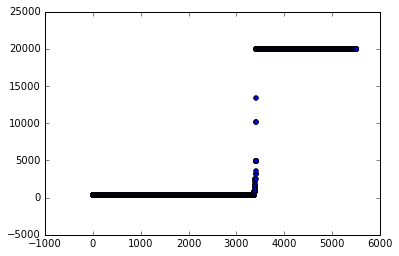

In [29]:
x = np.arange(1,len(dat3.FIT_STATISTIC)+1, 1)
y = dat3.FIT_STATISTIC
plt.scatter(x,y)
plt.show()
#dat4.plot.scatter(x,y)

In [30]:
dat4 = dat3[0:3400]

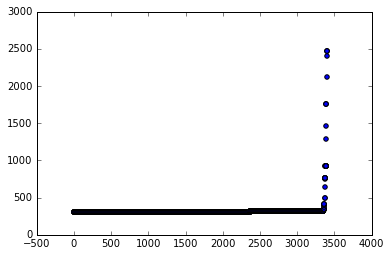

In [31]:
x = np.arange(1,len(dat4.FIT_STATISTIC)+1, 1)
y = dat4.FIT_STATISTIC
plt.scatter(x,y)
plt.show()
#dat4.plot.scatter(x,y)

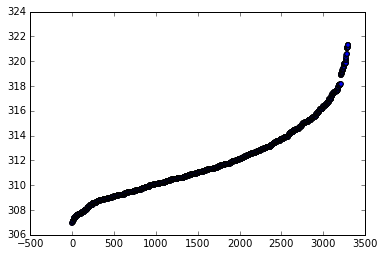

In [32]:
dat4 = dat3[0:3300]

x = np.arange(1,len(dat4.FIT_STATISTIC)+1, 1)
y = dat4.FIT_STATISTIC
plt.scatter(x,y)
plt.show()
#dat4.plot.scatter(x,y)

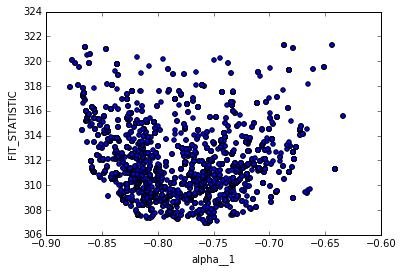

In [33]:
dat4.plot.scatter('alpha__1','FIT_STATISTIC')

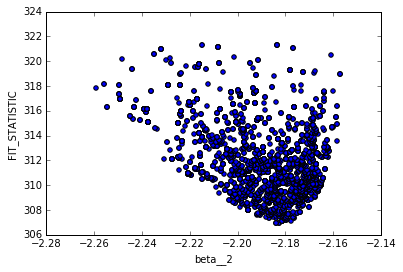

In [34]:
dat4.plot.scatter('beta__2','FIT_STATISTIC')

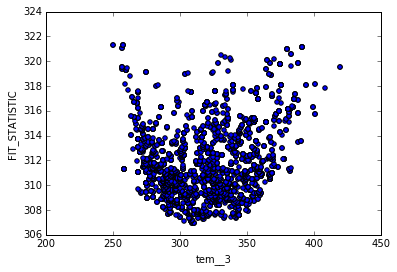

In [35]:
dat4.plot.scatter('tem__3','FIT_STATISTIC')

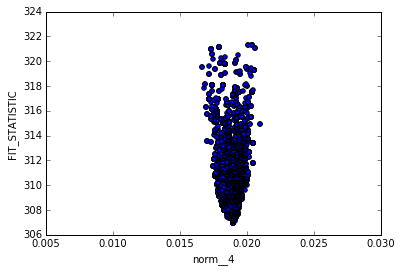

In [36]:
dat4.plot.scatter('norm__4','FIT_STATISTIC')

(0.016, 0.022)

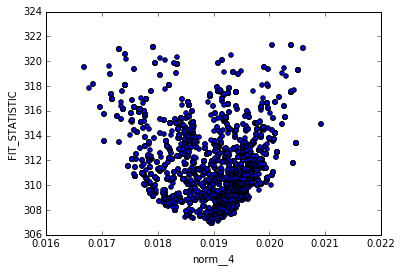

In [37]:
dat4.plot.scatter('norm__4','FIT_STATISTIC')
plt.xlim(0.016,0.022)  # these need to go after the dat4.plot command
#plt.ylim(306,318)

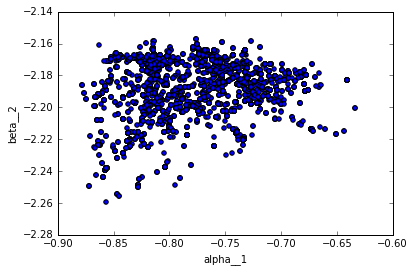

In [38]:
dat4.plot.scatter('alpha__1','beta__2')#, bins='log')#, gridsize=40, cmap=plt.cm.YlOrRd_r)

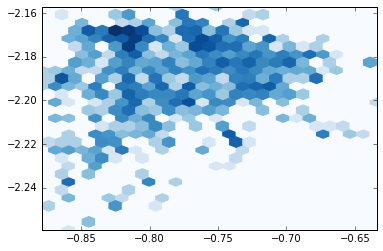

In [39]:
plt.hexbin(dat4.alpha__1, dat4.beta__2, bins='log', gridsize=25, cmap=plt.cm.Blues)

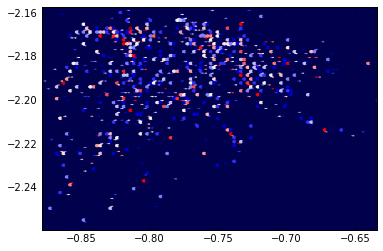

In [40]:
plt.hexbin(dat4.alpha__1, dat4.beta__2, bins='log', cmap=plt.cm.seismic)

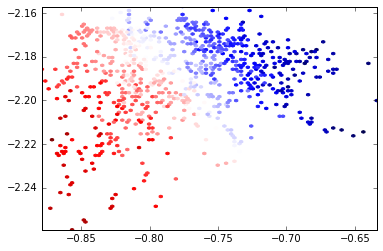

In [41]:
plt.hexbin(dat4.alpha__1, dat4.beta__2, dat4.tem__3, bins='log', cmap=plt.cm.seismic)

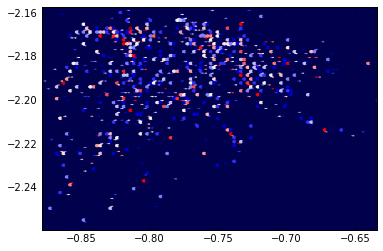

In [42]:
plt.hexbin(dat4.alpha__1, dat4.beta__2, bins='log', cmap=plt.cm.seismic)

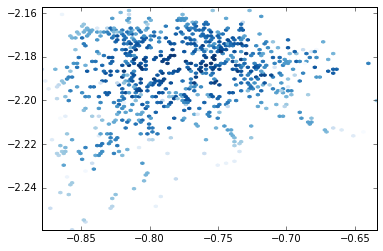

In [43]:
plt.hexbin(dat4.alpha__1, dat4.beta__2, dat4.FIT_STATISTIC, cmap=plt.cm.Blues_r)

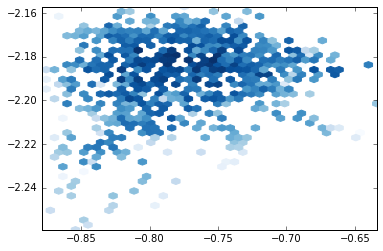

In [44]:
plt.hexbin(dat4.alpha__1, dat4.beta__2, C=dat4.FIT_STATISTIC, bins='log', gridsize=40, cmap=plt.cm.Blues_r)

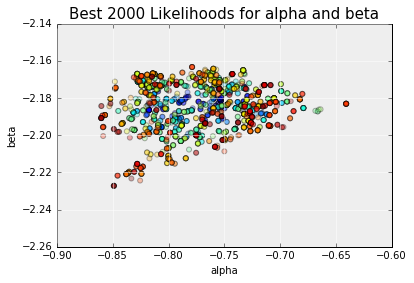

In [45]:
n = 0
N = 2000
x = dat4.alpha__1
y = dat4.beta__2
z = dat4.FIT_STATISTIC

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

scatter = ax.scatter(x[n:N], y[n:N],
                     c= z[n:N],
                     s=25,
                     alpha=0.3)
                     #c=np.random.random(size=N),
                     #s = 1000 * np.random.random(size=N),
                     #alpha=0.3,
                     #cmap=plt.cm.jet)
#ax.set_ylim(-2.28,-2.14)
#ax.set_xlim(-0.9,-0.6)
ylims = (min(y), max(y))
xlims = (min(x), max(x))

pars = x.name.split("__")[0], y.name.split("__")[0]

ax.set_xlabel("%s" %pars[0])
ax.set_ylabel("%s" %pars[1])
ax.set_title("Best %i Likelihoods for %s and %s"%(N, pars[0], pars[1]), size=15)


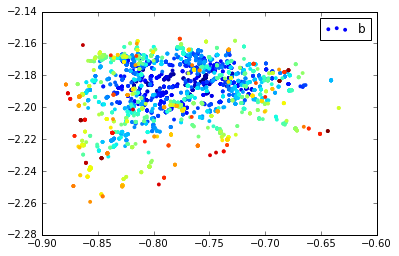

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = np.random.normal(size=1000)
y = x * 3 + np.random.normal(size=1000)

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(dat4.alpha__1, dat4.beta__2, c=dat4.FIT_STATISTIC, s=15, edgecolor='')
ax.legend("best")
#plt.show()

#dat4.alpha__1, dat4.beta__2, C=dat4.tem__3

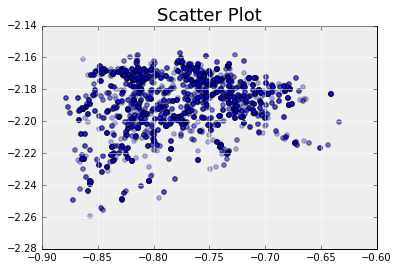

In [47]:
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(dat4.alpha__1, dat4.beta__2,
                     #c=z,
                     #s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.Blues)

ax.set_title("Scatter Plot", size=18);

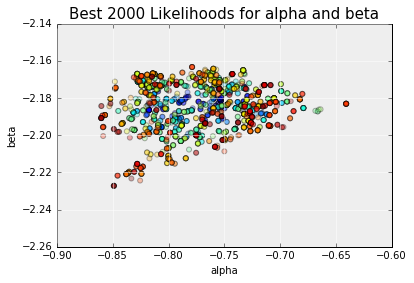

In [48]:
n = 0
N = 2000
x = dat4.alpha__1
y = dat4.beta__2
z = dat4.FIT_STATISTIC

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

scatter = ax.scatter(x[n:N], y[n:N],
                     c= z[n:N],
                     s=25,
                     alpha=0.3)
                     #c=np.random.random(size=N),
                     #s = 1000 * np.random.random(size=N),
                     #alpha=0.3,
                     #cmap=plt.cm.jet)
#ax.set_ylim(-2.28,-2.14)
#ax.set_xlim(-0.9,-0.6)
ylims = (min(y), max(y))
xlims = (min(x), max(x))

pars = x.name.split("__")[0], y.name.split("__")[0]

ax.set_xlabel("%s" %pars[0])
ax.set_ylabel("%s" %pars[1])
ax.set_title("Best %i Likelihoods for %s and %s"%(N, pars[0], pars[1]), size=15)


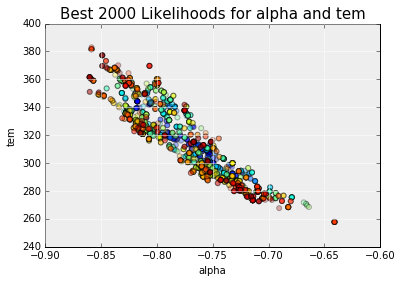

In [49]:
n = 0
N = 2000
x = dat4.alpha__1
y = dat4.tem__3
z = dat4.FIT_STATISTIC

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

scatter = ax.scatter(x[n:N], y[n:N],
                     c= z[n:N],
                     s=25,
                     alpha=0.3)
                     #c=np.random.random(size=N),
                     #s = 1000 * np.random.random(size=N),
                     #alpha=0.3,
                     #cmap=plt.cm.jet)
ylims = (min(y), max(y))
xlims = (min(x), max(x))


pars = x.name.split("__")[0], y.name.split("__")[0]

ax.set_xlabel("%s" %pars[0])
ax.set_ylabel("%s" %pars[1])
ax.set_title("Best %i Likelihoods for %s and %s"%(N, pars[0], pars[1]), size=15)

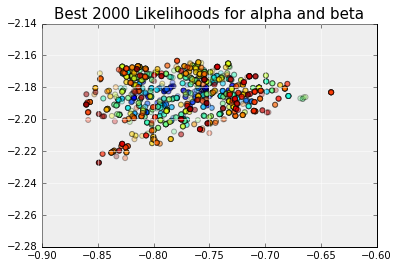

In [50]:
n = 0
N = 2000
x = dat4.alpha__1
y = dat4.beta__2
z = dat4.FIT_STATISTIC

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

scatter = ax.scatter(x[n:N], y[n:N],
                     c= z[n:N],
                     s=25,
                     alpha=0.3)
                     #c=np.random.random(size=N),
                     #s = 1000 * np.random.random(size=N),
                     #alpha=0.3,
                     #cmap=plt.cm.jet)
ax.set_ylim(-2.28,-2.14)
ax.set_xlim(-0.9,-0.6)
pars = x.name.split("__")[0], y.name.split("__")[0]
ax.set_title("Best %i Likelihoods for %s and %s"%(N, pars[0], pars[1]), size=15)

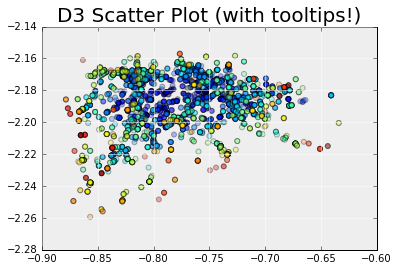

In [51]:
#from mpld3 import plugins

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = len(dat4)
scatter = ax.scatter(dat4.alpha__1, dat4.beta__2,
                     c=dat4.FIT_STATISTIC,
                     s=25,
                     alpha=0.3)
                     #c=np.random.random(size=N),
                     #s = 1000 * np.random.random(size=N),
                     #alpha=0.3,
                     #cmap=plt.cm.jet)

ax.set_title("D3 Scatter Plot (with tooltips!)", size=20)


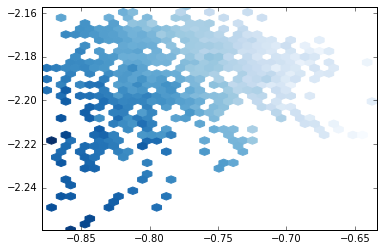

In [52]:
plt.hexbin(dat4.alpha__1, dat4.beta__2, dat4.tem__3, bins='log',gridsize=35, cmap=plt.cm.Blues)

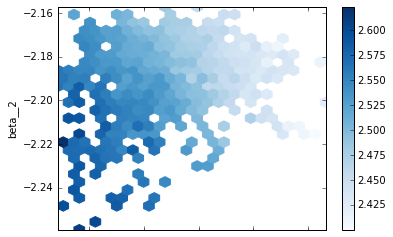

In [53]:
dat4.plot.hexbin('alpha__1','beta__2','tem__3', bins='log', gridsize=25, cmap=plt.cm.Blues)

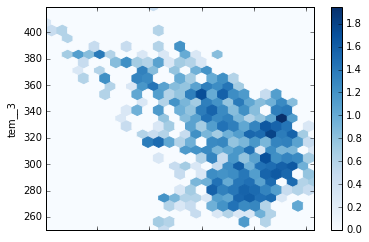

In [54]:
dat4.plot.hexbin('beta__2','tem__3', bins='log', gridsize=25, cmap=plt.cm.Blues)

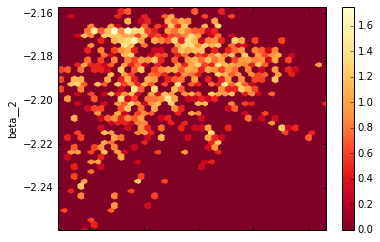

In [55]:
dat4.plot.hexbin('alpha__1','beta__2', bins='log', gridsize=40, cmap=plt.cm.YlOrRd_r)

(306, 318)

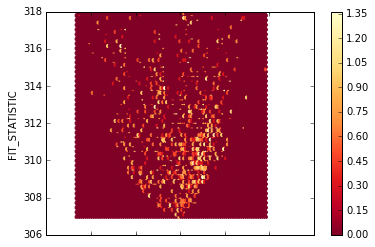

In [56]:
dat4.plot.hexbin('norm__4','FIT_STATISTIC', bins='log', cmap=plt.cm.YlOrRd_r)
plt.xlim(0.016,0.022)  # these need to go after the dat4.plot command
plt.ylim(306,318)

In [57]:
dat4.columns

Index([u'alpha__1', u'beta__2', u'tem__3', u'norm__4', u'plIndex__5',
       u'norm__6', u'FIT_STATISTIC'],
      dtype='object')

In [58]:
dat4.count()

alpha__1         3300
beta__2          3300
tem__3           3300
norm__4          3300
plIndex__5       3300
norm__6          3300
FIT_STATISTIC    3300
dtype: int64

In [59]:
dat4.idxmax()

alpha__1         5244
beta__2           879
tem__3           5409
norm__4          5383
plIndex__5       4976
norm__6           443
FIT_STATISTIC     443
dtype: int64

In [61]:
!open ./